# Producing fitness correlation plots

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap


# for plotting
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42


In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
filedir = '/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/amyloids_energy_modelling/Combinatorial_mutants_analysis/files/'

datasets = ['DTS01',
            'DTS05',
           ]

filenames = {}
for dataset in datasets:
    filenames[dataset] = 'mochi_all_variants_full_table_' + dataset + '_20240424.tsv'

In [6]:
# For joint modelling making sure that the aa_seq is comlemented the full Ab sequence
# this was done in notebook M0

all_variants = {}

total_n_vars = 0

for dataset in datasets:
    print(dataset)
    all_variants[dataset] = pd.read_csv(filedir + filenames[dataset], sep='\t')
    # check length of aa_seq, should be already complemented to full Ab sequence (42 aa)
    print(np.unique([len(elem) for elem in all_variants[dataset]['aa_seq']], return_counts=True), '\n')
    
    total_n_vars = total_n_vars + len(all_variants[dataset])

DTS01
(array([42]), array([37671])) 

DTS05
(array([42]), array([5283])) 



In [7]:
# 213771 variants in total, 182099 without DTS02, 45925 for ensemble of DTS01+DTS05+DTS14
total_n_vars

42954

Text(0.5, 1.0, 'DTS01\nR = 0.61539, pval:0.0')

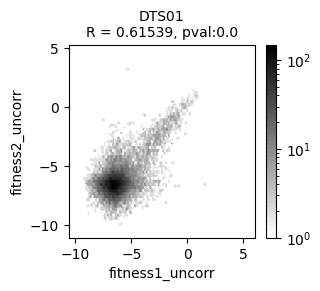

In [9]:
curr_doubles_dataset = 'DTS01'

curr_replicates = ['1','2']

fig, ax = plt.subplots(figsize=(3,2.5))

curr_df = all_variants[curr_doubles_dataset][['fitness' + curr_replicates[0] + '_uncorr','fitness' + curr_replicates[1] + '_uncorr']].dropna()

curr_x = list(curr_df['fitness' + curr_replicates[0] + '_uncorr'])
curr_y = list(curr_df['fitness' + curr_replicates[1] + '_uncorr'])


n_bin = 50
cmap = LinearSegmentedColormap.from_list('whiteblack', ['white', 'black'], N=n_bin)

z = plt.hexbin(curr_x, curr_y, bins='log', cmap = cmap)

plt.colorbar(z, ax=ax
                        )

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('fitness' + curr_replicates[0] + '_uncorr')
plt.ylabel('fitness' + curr_replicates[1] + '_uncorr')
plt.title(curr_doubles_dataset + '\n' + 'R = ' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],20)), 
          fontsize=10)

#plt.savefig('./figures/20240510_Fig4b_fitness_' + curr_replicates[0] + '_uncorr_vs_fitness' + curr_replicates[0] + '_uncorr_' + curr_doubles_dataset + '.pdf', bbox_inches='tight', 
#            transparent=True)


Text(0.5, 1.0, 'DTS01\nR = 0.63642, pval:0.0')

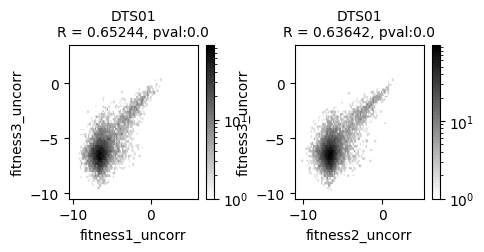

In [10]:
# 2 vs 3 and 1 vs 3 for supplementary
curr_doubles_dataset = 'DTS01'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,2))

plt.subplots_adjust(wspace=0.4)

curr_replicates = ['1','3']
curr_df = all_variants[curr_doubles_dataset][['fitness' + curr_replicates[0] + '_uncorr','fitness' + curr_replicates[1] + '_uncorr']].dropna()
curr_x = list(curr_df['fitness' + curr_replicates[0] + '_uncorr'])
curr_y = list(curr_df['fitness' + curr_replicates[1] + '_uncorr'])
n_bin = 50
cmap = LinearSegmentedColormap.from_list('whiteblack', ['white', 'black'], N=n_bin)

z = ax1.hexbin(curr_x, curr_y, bins='log', cmap = cmap)
plt.colorbar(z, ax=ax1)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

ax1.set_xlabel('fitness' + curr_replicates[0] + '_uncorr')
ax1.set_ylabel('fitness' + curr_replicates[1] + '_uncorr')
ax1.set_title(curr_doubles_dataset + '\n' + 'R = ' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],20)), 
          fontsize=10)


curr_replicates = ['2','3']
curr_df = all_variants[curr_doubles_dataset][['fitness' + curr_replicates[0] + '_uncorr','fitness' + curr_replicates[1] + '_uncorr']].dropna()
curr_x = list(curr_df['fitness' + curr_replicates[0] + '_uncorr'])
curr_y = list(curr_df['fitness' + curr_replicates[1] + '_uncorr'])
n_bin = 50
cmap = LinearSegmentedColormap.from_list('whiteblack', ['white', 'black'], N=n_bin)

z = ax2.hexbin(curr_x, curr_y, bins='log', cmap = cmap)
plt.colorbar(z, ax=ax2)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

ax2.set_xlabel('fitness' + curr_replicates[0] + '_uncorr')
ax2.set_ylabel('fitness' + curr_replicates[1] + '_uncorr')
ax2.set_title(curr_doubles_dataset + '\n' + 'R = ' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],20)), 
          fontsize=10)

#plt.savefig('./figures/20240510_Suppl_fitness_' + curr_replicates[0] + '_uncorr_vs_fitness' + curr_replicates[0] + '_uncorr_' + curr_doubles_dataset + '.pdf', bbox_inches='tight', 
#            transparent=True)


Text(0.5, 1.0, 'DTS05\nR = 0.83864, pval:0.0')

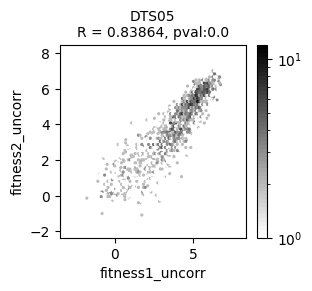

In [11]:
curr_doubles_dataset = 'DTS05'

curr_replicates = ['1','2']

fig, ax = plt.subplots(figsize=(3,2.5))

curr_df = all_variants[curr_doubles_dataset][['fitness' + curr_replicates[0] + '_uncorr','fitness' + curr_replicates[1] + '_uncorr']].dropna()

curr_x = list(curr_df['fitness' + curr_replicates[0] + '_uncorr'])
curr_y = list(curr_df['fitness' + curr_replicates[1] + '_uncorr'])


n_bin = 50
cmap = LinearSegmentedColormap.from_list('whiteblack', ['white', 'black'], N=n_bin)

z = plt.hexbin(curr_x, curr_y, bins='log', cmap = cmap)

plt.colorbar(z, ax=ax
                        )

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('fitness' + curr_replicates[0] + '_uncorr')
plt.ylabel('fitness' + curr_replicates[1] + '_uncorr')
plt.title(curr_doubles_dataset + '\n' + 'R = ' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],20)), 
          fontsize=10)

#plt.savefig('./figures/20240510_Fig4b_fitness_' + curr_replicates[0] + '_uncorr_vs_fitness' + curr_replicates[0] + '_uncorr_' + curr_doubles_dataset + '.pdf', bbox_inches='tight', 
#            transparent=True)


Text(0.5, 1.0, 'DTS05\nR = 0.86826, pval:0.0')

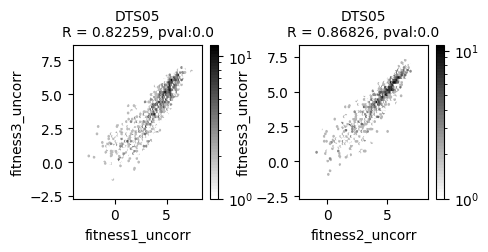

In [12]:
# 2 vs 3 and 1 vs 3 for supplementary
curr_doubles_dataset = 'DTS05'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,2))

plt.subplots_adjust(wspace=0.4)

curr_replicates = ['1','3']
curr_df = all_variants[curr_doubles_dataset][['fitness' + curr_replicates[0] + '_uncorr','fitness' + curr_replicates[1] + '_uncorr']].dropna()
curr_x = list(curr_df['fitness' + curr_replicates[0] + '_uncorr'])
curr_y = list(curr_df['fitness' + curr_replicates[1] + '_uncorr'])
n_bin = 50
cmap = LinearSegmentedColormap.from_list('whiteblack', ['white', 'black'], N=n_bin)

z = ax1.hexbin(curr_x, curr_y, bins='log', cmap = cmap)
plt.colorbar(z, ax=ax1)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

ax1.set_xlabel('fitness' + curr_replicates[0] + '_uncorr')
ax1.set_ylabel('fitness' + curr_replicates[1] + '_uncorr')
ax1.set_title(curr_doubles_dataset + '\n' + 'R = ' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],20)), 
          fontsize=10)


curr_replicates = ['2','3']
curr_df = all_variants[curr_doubles_dataset][['fitness' + curr_replicates[0] + '_uncorr','fitness' + curr_replicates[1] + '_uncorr']].dropna()
curr_x = list(curr_df['fitness' + curr_replicates[0] + '_uncorr'])
curr_y = list(curr_df['fitness' + curr_replicates[1] + '_uncorr'])
n_bin = 50
cmap = LinearSegmentedColormap.from_list('whiteblack', ['white', 'black'], N=n_bin)

z = ax2.hexbin(curr_x, curr_y, bins='log', cmap = cmap)
plt.colorbar(z, ax=ax2)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

ax2.set_xlabel('fitness' + curr_replicates[0] + '_uncorr')
ax2.set_ylabel('fitness' + curr_replicates[1] + '_uncorr')
ax2.set_title(curr_doubles_dataset + '\n' + 'R = ' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],20)), 
          fontsize=10)

#plt.savefig('./figures/20240510_Suppl_fitness_' + curr_replicates[0] + '_uncorr_vs_fitness' + curr_replicates[0] + '_uncorr_' + curr_doubles_dataset + '.pdf', bbox_inches='tight', 
#            transparent=True)
